In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Parameters [ 0.21913687 -6.56110985 -0.35213045]
RMSE: 0.008995738278640912
R-squared: 0.986970924688948


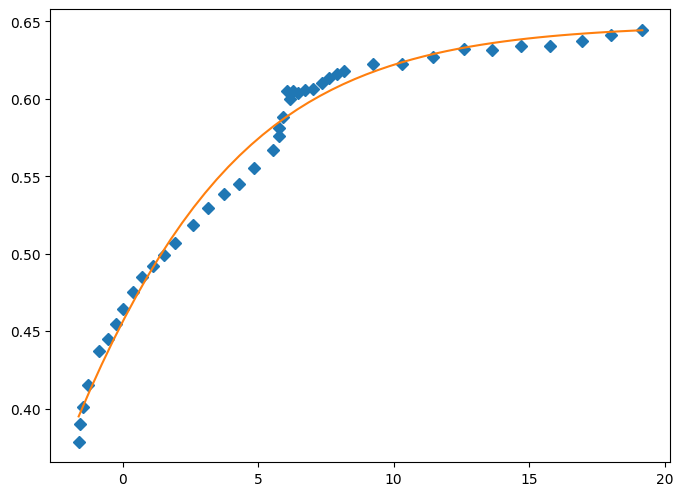

In [8]:
import numpy,scipy,matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = numpy.array([19.1647,18.0189,16.9550,15.7683,14.7044,13.6269,12.6040,11.4309,10.2987,9.23465,8.18440,7.89789,7.62498,7.36571,7.01106,6.71094,6.46548,6.27436,6.16543,6.05569,5.91904,5.78247,5.78247,5.53661,4.85425,4.29468,3.74888,3.16206,2.58882,1.93371,1.52426,1.14211,0.719035,0.377708,0.0226971,-0.223181,-0.537231,-0.878491,-1.27484,-1.45266,-1.57583,-1.61717])
yData = numpy.array([0.644557,0.641059,0.637555,0.634059,0.634135,0.631825,0.631899,0.627203,0.622516,0.622516,0.617818,0.616103,0.613736,0.610175,0.606613,0.605445,0.603676,0.604887,0.600127,0.604909,0.588207,0.581056,0.576292,0.566761,0.555472,0.545367,0.538842,0.529336,0.518635,0.506747,0.499018,0.491885,0.484754,0.475230,0.464514,0.454387,0.444861,0.437128,0.415076,0.401363,0.390034,0.378698])

def func(x,a,b,Offset): 
    return 1.0/(1.0 + numpy.exp(-a * (x-b))) + Offset

def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore")
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)

def generate_Initial_Parameters():
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)
    
    parameterBounds = []
    parameterBounds.append([minX,maxX]) 
    parameterBounds.append([minY,maxY])
    parameterBounds.append([0.0,maxY])

    result = differential_evolution(sumOfSquaredError,parameterBounds, seed=3)
    return result.x

geneticParameters = generate_Initial_Parameters()

fittedParameters, pcov = curve_fit(func,xData,yData,geneticParameters)

print('Parameters',fittedParameters)

modelPredictions = func(xData,* fittedParameters)

absError = modelPredictions - yData

SE = numpy.square(absError)
MSE = numpy.mean(SE)
RMSE = numpy.sqrt(MSE)
Rsquared = 1.0 - (numpy.var(absError)/ numpy.var(yData))

print('RMSE:',RMSE)

print('R-squared:',Rsquared)

def ModelAndScatterPlot(graphWidth,grapjHeight):
    f = plt.figure(figsize = (graphWidth/100.0, graphHeight/100), dpi=100)
    axes = f.add_subplot(111)
    
    axes.plot(xData, yData,'D')
    
    xModel = numpy.linspace(min(xData),max(xData))
    yModel = func(xModel, *fittedParameters)
    
    
    axes.plot(xModel, yModel)
    
    plt.show()
    plt.close('all')
    
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth,graphHeight)